In [7]:
from sqlite3 import connect
from solution import Solution
from basis import Basis
import itertools
import numpy as np

# SET ACCURATE PHI

a = 1
b = 1

eps = 0.2

power = 4
params = {
    'n_dims': 2,
    'dim_sizes': np.array([2, 10]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 2,
}
sol = Solution(**params)
w = (sol.steps[0]/2)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)
# power = int(3/2*power)
c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points
# border_points = np.array([[-1, 0.5], [1, 0.5],
#                             [0.5, -1], [0.5, 1],
#                             [-1, -0.5], [1, -0.5],
#                             [-0.5, -1], [-0.5, 1],])

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],1)-eps*u_bas([0,2],1)

                                                                                            +(u_loc([0,0],0)*u_bas([0,1],1)**2)/2
                                                                                            
                                                                                            # +(u_bas([0,0],0)*u_loc([0,1],1)**2)/4

                                                                                            -(u_bas([0,0],0)*u_loc([0,1],1)**2+
                                                                                            2*u_bas([0,0],0)*u_bas([0,1],1)*u_loc([0,1],1))/2/3
                                                                                            ) * w**2 ,
                         lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            # '''
                                                                                            # +(2*u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)
                                                                                            # +u_bas([0,2],1)*u_loc([0,1],0)**2)/2
                                                                                            # '''

                                                                                            # -(2*u_loc([0,1],1)*u_bas([0,1],0)*u_loc([0,0],0)
                                                                                            # +u_bas([0,2],1)*u_loc([0,1],0)**2)/2

                                                                                                +(2*(u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)+
                                                                                                +u_loc([0,1],1)*u_bas([0,1],0)*u_loc([0,0],0)+
                                                                                                +u_loc([0,1],1)*u_loc([0,1],0)*u_bas([0,0],0))+

                                                                                            +u_bas([0,2],1)*u_loc([0,1],0)**2+
                                                                                          +2*u_loc([0,2],1)*u_bas([0,1],0)*u_loc([0,1],0))/2/3 
                                                                                          ) * w**2]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0,
                          lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]

def terminal_state(rho,x):
    point = x
    t, x = x
    if t >= 0.0999:
        p = 6*x*(1-x)
        return rho.eval(point, [0, 0], func=0, cells_closed_right=True) - p
    else:
        return 0

def p(x):
    return 6*x*(1-x)

def initial_state(point):
    t, x = point
    if t == 0:
        return 1
    else:
        return 10*(0.1 - t)

def reversed_intitial(point):
    t, x = point
    # if t == 0.1:
    #     return 1
    # else:
    return 10*t

border_weight = 1
small = 1e-5
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*u_bas([0,0],1) * border_weight,
                         lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight, 
                            ]

border_right_operators = [lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (u([0,0],0)-p(x[0])) * border_weight,
                          lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x) * border_weight,
                            ]
border_ops = [border_left_operators, border_right_operators]



def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])
border_points = np.array([[1, 0.5], [1, -0.5],
                            [0.5, -1], [0.5, 1],
                            [-0.5, -1], [-0.5, 1],
                            [-1, 0.5], [-1, -0.5],
                            ])
points=[colloc_points, connect_points ,border_points]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
#        'connect_ops':connect_ops
}

sol.cells_coefs *= 0.0


In [15]:
sol.cell_size

32

In [16]:
sol.cells_shape

(2, 2, 10, 4, 4)

In [12]:
np.prod(sol.cells_coefs.shape)

640

In [18]:
sol.dim_sizes

array([ 2, 10])

In [6]:
mat = np.array([[1,2,3],
[4,6,8],
[5,7,9]])
mat[0]

array([1, 2, 3])

In [11]:
sol.solve(**iteration_dict,verbose=True, threshold=1e-2)

0.6073793761229793
0.46936333497677285
0.5266909468757439
0.4192577001729011
0.3395083919466591
0.598137128108019
1.0404535506919554
1.5715030956333182
1.80482416548415
1.2886383842295472
1.1761297199331586
1.128228109704791
1.447331840972633
1.9443852541282325
1.8241794962973286
1.1246125982017654
0.9620445292901865
0.7751588627519652
1.1822640323933613
1.4035322190511306
1.5370630163206398
1.4880623878561083
1.2717280419413133
1.0328552460354903
1.1380380245362505
1.3343618991148865
1.5222799161878506
1.317004652594484
0.9827730261126272
1.0943963515392108
1.5928963519761472
1.9094163398461346
1.6311807069379922
1.4153315346298587
0.9701352994464221
0.9082768474830444
0.9879403990430013
1.185654299041423
0.9414364567825795
1.112977204193658
1.5027332183181268
1.6605884097183188
1.5739749627863584
0.9977134236113363
1.0435326334600825
1.2520432515629132
1.212752525096925
0.852132226639706
0.7063118553697578
0.7905101085353774
0.8374432293511611
0.9621699376725508
1.089207864085158
1.1

KeyboardInterrupt: 

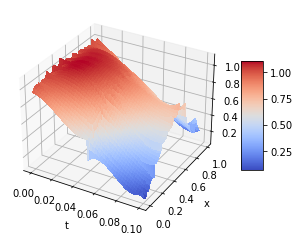

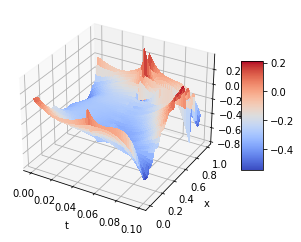

In [12]:
sol.plot2d(func_num=0)
sol.plot2d(func_num=1)

In [2]:
sol.iterate_cells(**iteration_dict)

In [3]:
sol.solve(**iteration_dict,verbose=True)

0.290766571282047
0.09322248211093029
0.015279749893365863
0.0016546381951943467
0.0001583307734960293
1.539516307041966e-05
1.6756244277556231e-06
2.949811296892868e-07
4.805604558733023e-08
1.0645106435225316e-08
1.4301809458938664e-09
1.1696010826511838e-10
1.9476947832330893e-11
Iterations to converge:  12


In [13]:
from solution import Solution
from basis import Basis
import itertools
import numpy as np

# SET ACCURATE PHI

a = 1
b = 1

eps = 0.2

power = 6
params = {
    'n_dims': 2,
    'dim_sizes': np.array([3, 6]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 1,
}

# sol = Solution(**params)
rho = Solution(**params)
phi = Solution(**params)
w = (rho.steps[0]/2)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points

colloc_left_operators_phi = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0])-eps*u_bas([0,2])

                                                                                            +(rho.eval(x,[0,0])*u_bas([0,1],1)**2)/2
                                                                                            # +(u_bas([0,0],0)*u_loc([0,1],1)**2)/4

                                                                                            # -(u_bas([0,0],0)*u_loc([0,1],1)**2+
                                                                                            # 2*u_bas([0,0],0)*u_bas([0,1],1)*u_loc([0,1],1))/2/3
                                                                                            ) * w**2]
colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            # '''
                                                                                            # +(2*u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)
                                                                                            # +u_bas([0,2],1)*u_loc([0,1],0)**2)/2
                                                                                            # '''
                                                                                            -(2*phi.eval(x,[0,1])*u_bas([0,1],0)*u_loc([0,0],0)
                                                                                            +phi.eval(x,[0,2])*u_loc([0,1],0)**2)/2

                                                                                        #         +(2*(u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)+
                                                                                        #         +u_loc([0,1],1)*u_bas([0,1],0)*u_loc([0,0],0)+
                                                                                        #         +u_loc([0,1],1)*u_loc([0,1],0)*u_bas([0,0],0))+

                                                                                        #     +u_bas([0,2],1)*u_loc([0,1],0)**2+
                                                                                        #   +2*u_loc([0,2],1)*u_bas([0,1],0)*u_loc([0,1],0))/2/3 
                                                                                          ) * w**2]
colloc_right_operators_phi = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]
colloc_ops_phi = [colloc_left_operators_phi, colloc_right_operators_phi]


def terminal_state(rho,x):
    point = x
    t, x = x
    if t >= 0.0999:
        p = 6*x*(1-x)
        return rho.eval(point, [0, 0], func=0, cells_closed_right=True) - p
    else:
        return 0

def p(x):
    return 6*x*(1-x)

def initial_state(point):
    t, x = point
    if t == 0:
        return 1
    else:
        return 10*(0.1 - t)

def initial_state(point):
    t, x = point
    if t == 0:
        if (x > 0.25)&(x < 0.75):
            return 2
        else:
            return 0
    else:
        return 0

# def reversed_intitial(point):
#     t, x = point
#     # if t == 0.1:
#     #     return 1
#     # else:
#     return 10*t

border_weight = 1
small = 1e-5
border_left_operators_phi = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*u_bas([0,0]) * border_weight]
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight, 
                            ]

border_right_operators_phi = [lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (rho.eval(x,[0,0],cells_closed_right=True)-p(x[0])) * border_weight]
border_right_operators = [lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x) * border_weight,
                            ]
border_ops = [border_left_operators, border_right_operators]
border_ops_phi = [border_left_operators_phi, border_right_operators_phi]



def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])

border_points = np.array([[1, 0.5], [1, -0.5],
                            [0.5, -1], [0.5, 1],
                            [-0.5, -1], [-0.5, 1],
                            [-1, 0.5], [-1, -0.5],
                            ])
points=[colloc_points, connect_points ,border_points]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
#        'connect_ops':connect_ops
}

iteration_dict_phi = {'points':points,
        'colloc_ops':colloc_ops_phi,
        'border_ops':border_ops_phi,
#        'connect_ops':connect_ops
}

phi.cells_coefs *= 0.0
rho.cells_coefs *= 0.0


In [16]:
thresh = 1e-5

border_right_operators = [lambda u, _, x, x_loc: int(x[0]<phi.area_lims[0,1]-small)*initial_state(x) * border_weight]
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]<phi.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight]
border_ops = [border_left_operators, border_right_operators]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            +(2*phi.eval(x,[0,1])*u_bas([0,0],0)*u_loc([0,1],0)
                                                                                            +phi.eval(x,[0,2])*u_bas([0,0],0)*u_loc([0,0],0))/2
                                                                                          )/eps * w**2 ]
colloc_ops = [colloc_left_operators, colloc_right_operators]
iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
        'threshold':thresh
}
rho.solve(**iteration_dict, verbose=True)


border_left_operators_phi = [lambda _, u_bas, x, x_loc: int(x[0]>phi.area_lims[0,0]+small)*u_bas([0,0]) * border_weight]
border_right_operators_phi = [lambda u, _, x, x_loc: int(x[0]>phi.area_lims[0,1]-small) * (rho.eval(x-[0,1e-5],[0,0],cells_closed_right=True)-p(x[0])) * border_weight]
border_ops_phi = [border_left_operators_phi, border_right_operators_phi]
colloc_left_operators_phi = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0])-eps*u_bas([0,2])
                                                                                            -(rho.eval(x,[0,0])*u_bas([0,1])*u_loc([0,1]))/2
                                                                                            )/eps * w**2]
colloc_right_operators_phi = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops_phi = [colloc_left_operators_phi, colloc_right_operators_phi]
iteration_dict_phi = {'points':points,
        'colloc_ops':colloc_ops_phi,
        'border_ops':border_ops_phi,
        'threshold':thresh
}
phi.solve(**iteration_dict_phi, verbose=True)

0.7267745519308237
0.5493000244048981
0.5563810346006957
0.5477103697105801
0.3854006512085913
0.19942381811297905
0.22149061980009682
0.13479509989218869
0.11851084968107521
0.07564357481464258
0.06214931703616146
0.05114019304010224
0.03325264546959662
0.027263697581401125
0.01957630757875409
0.028284465259712278
0.014779541173827349
0.01317503330663173
0.009670690958947722
0.008285630264714551
0.006026521576025942
0.0053017921144378685
0.005055673905418723
0.004032956784839892
0.003425242880661053
0.0022110395534295432
0.0022248587053323443
0.0016019537206327927
0.0015108731733866482
0.0011563602640995846
0.001132581441882094
0.0008063033909913447
0.0007250081335706399
0.0006057677662626437
0.0003996615955513122
0.0004049791889419313
0.00028651123505556153
0.0002753865901596389
0.00021394716627125276
0.00020273218940482923
0.00014240827691303082
0.00013419693774230357
0.00010543724738144855
8.012582175492833e-05
7.508636866786211e-05
4.956153887548942e-05
4.841134840617711e-05
3.827

KeyboardInterrupt: 

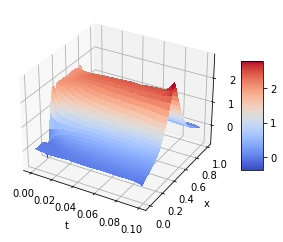

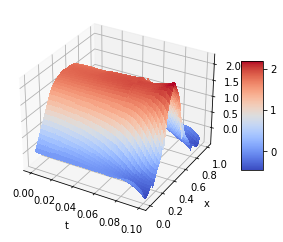

In [17]:
rho.plot2d(func_num=0)
phi.plot2d(func_num=0)

In [2]:
rho.eval([0.1, 0],[0,0], cells_closed_right=True)

0.0

In [3]:
pi = 3.141592659
def rho_exact(point):
    t,x = point
    T = 0.1
    # return 1*(1 - t/(T*1.1)) + 6*x*(1-x) * t/(T*1.1)
    return 1*(1 - (t/T)**2) + pi/2*np.sin(pi*x) * (t/T)**2

border_left_operators_phi = [lambda _, u_bas, x, x_loc: int(x[0]>phi.area_lims[0,0]+small)*u_bas([0,0]) * border_weight]
border_right_operators_phi = [lambda u, _, x, x_loc: int(x[0]>phi.area_lims[0,1]-small) * (rho_exact(x)-p(x[0])) * border_weight]
border_ops_phi = [border_left_operators_phi, border_right_operators_phi]

colloc_left_operators_phi = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0])-eps*u_bas([0,2])
                                                                                            -(rho_exact(x)*u_bas([0,1]))/2
                                                                                            ) * w**2]
colloc_right_operators_phi = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops_phi = [colloc_left_operators_phi, colloc_right_operators_phi]

thresh = 1e-5
iteration_dict_phi = {'points':points,
        'colloc_ops':colloc_ops_phi,
        'border_ops':border_ops_phi,
        'threshold':thresh
}
phi.solve(**iteration_dict_phi, verbose=True)

0.6095145352346922
0.3879850030615094
0.32449587503735144
0.27196906620834316
0.2546573922107558
0.22389947232784518
0.11175330311570675
0.050604943709881986
0.031054417287438206
0.02143267059276489
0.009478028474386578
0.003918002804492518
0.003419330680369908
0.0012944873299679822
0.0009347111034853416
0.0004470084853735023
0.0002740963859047467
0.0001310384236514041
6.159026622602412e-05
3.122588936932489e-05
1.44963719482449e-05
9.528647534093858e-06
Iterations to converge:  21


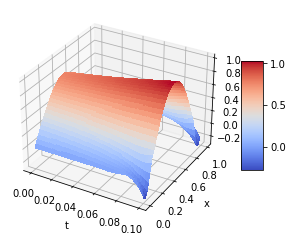

In [4]:
phi.plot2d()

In [23]:
rho_exact([0.1, 1])

-8.49833302512715e-09

In [24]:
rho_exact([0.1, 0])

0.0

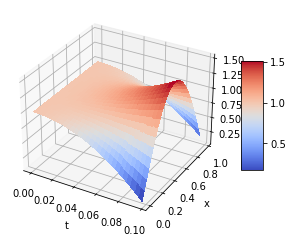

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
n=30
func = np.zeros((n,n))
x_lims = phi.area_lims[0]
y_lims = phi.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[j, i] = rho_exact([ax1[i], ax2[j]])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, func, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

# ax.set_xticks(X)
# ax.set_xticks(Y)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

In [40]:
def rho_t(point):
    t,x = point
    T = 0.1
    # return 1*(1 - t/(T*1.1)) + 6*x*(1-x) * t/(T*1.1)
    return 1*(1 - 2*(t/T**2)) + pi/2*np.sin(pi*x) * 2*(t/T**2)

def rho_x(point):
    t,x = point
    T = 0.1
    # return 1*(1 - t/(T*1.1)) + 6*x*(1-x) * t/(T*1.1)
    return pi**2/2*np.cos(pi*x) * (t/T)**2

def rho_xx(point):
    t,x = point
    T = 0.1
    # return 1*(1 - t/(T*1.1)) + 6*x*(1-x) * t/(T*1.1)
    return -pi**3/2*np.sin(pi*x) * (t/T)**2

def f(point):
    t,x = point
    T = 0.1
    bracket = (rho_t(point) - eps*rho_xx(point))/(-phi.eval(point,[1,0]) - phi.eval(point,[0,2]))
    return np.log10(abs(bracket - phi.eval(point,[0,1])/2 - np.sqrt((bracket + phi.eval(point,[0,1])/2)**2 + rho_x(point)/2)))

C:\Users\1\AppData\Local\Temp\ipykernel_29164\3385973962.py:23: RuntimeWarning: invalid value encountered in sqrt
  return np.log10(abs(bracket - phi.eval(point,[0,1])/2 - np.sqrt((bracket + phi.eval(point,[0,1])/2)**2 + rho_x(point)/2)))


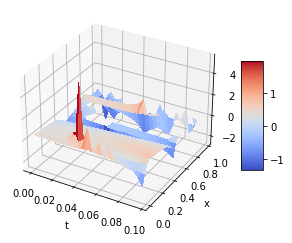

In [41]:
import matplotlib.pyplot as plt
from matplotlib import cm
n=30
func = np.zeros((n,n))
x_lims = phi.area_lims[0]
y_lims = phi.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[j, i] = f([ax1[i], ax2[j]])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, func, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

# ax.set_xticks(X)
# ax.set_xticks(Y)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('t')
ax.set_ylabel('x')
# ax.set_zscale('log') 
plt.show()